#📌 Extracão

In [313]:
import pandas as pd

In [314]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
dados = pd.read_json(url)

In [315]:
dados.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformação

In [316]:
dados.columns

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

In [317]:
dados.shape

(7267, 6)

In [318]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [319]:
dados.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [320]:
dados.isna().sum()

,0
customerID,0
Churn,0
customer,0
phone,0
internet,0
account,0


In [321]:
dados['customer'].iloc[0]

{'gender': 'Female',
 'SeniorCitizen': 0,
 'Partner': 'Yes',
 'Dependents': 'Yes',
 'tenure': 9}

In [322]:
dados['Churn'].unique()

array(['No', 'Yes', ''], dtype=object)

In [323]:
dados['account'].apply(lambda x: x['Contract']).unique()

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

In [324]:
dados['customerID'].duplicated().sum()

np.int64(0)

In [325]:
dados['customerID'].unique()

array(['0002-ORFBO', '0003-MKNFE', '0004-TLHLJ', ..., '9992-UJOEL',
       '9993-LHIEB', '9995-HOTOH'], dtype=object)

In [326]:
dados.describe()

,customerID,Churn,customer,phone,internet,account
count,7267,7267,7267,7267,7267,7267
unique,7267,3,891,3,129,6931
top,9995-HOTOH,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
freq,1,5174,223,3495,1581,6


In [327]:
customer_df = dados['customer'].apply(pd.Series)
phone_df = dados['phone'].apply(pd.Series)
internet_df = dados['internet'].apply(pd.Series)
account_df = dados['account'].apply(pd.Series)

In [328]:
account_df['Charges'].iloc[0]

{'Monthly': 65.6, 'Total': '593.3'}

In [329]:
charges_df = account_df['Charges'].apply(pd.Series)

In [330]:
charges_df = charges_df.rename(columns={
    'Monthly': 'MonthlyCharges',
    'Total': 'TotalCharges'
})


In [331]:
df_final = pd.concat(
    [
        dados[['customerID', 'Churn']],
        customer_df,
        phone_df,
        internet_df,
        account_df.drop(columns='Charges'),
        charges_df
    ],
    axis=1
)


In [332]:
df_final.head()


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [333]:
df_final.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [334]:
for col in df_final.select_dtypes(include='object').columns:
    df_final[col] = df_final[col].str.strip()

In [335]:
for col in df_final.select_dtypes(include='object').columns:
    df_final[col] = df_final[col].str.lower()

In [336]:
df_final.columns = df_final.columns.str.lower()

In [337]:
df_final.columns

Index(['customerid', 'churn', 'gender', 'seniorcitizen', 'partner',
       'dependents', 'tenure', 'phoneservice', 'multiplelines',
       'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'contract',
       'paperlessbilling', 'paymentmethod', 'monthlycharges', 'totalcharges'],
      dtype='object')

In [338]:
df_final['contract'].unique()

array(['one year', 'month-to-month', 'two year'], dtype=object)

In [339]:
df_final['paymentmethod'].unique()

array(['mailed check', 'electronic check', 'credit card (automatic)',
       'bank transfer (automatic)'], dtype=object)

In [340]:
df_final['internetservice'].unique()

array(['dsl', 'fiber optic', 'no'], dtype=object)

In [341]:
df_final['tenure'] = pd.to_numeric(df_final['tenure'], errors='coerce')
df_final['monthlycharges'] = pd.to_numeric(df_final['monthlycharges'], errors='coerce')
df_final['totalcharges'] = pd.to_numeric(df_final['totalcharges'], errors='coerce')

In [342]:
df_final.isna().sum()

,0
customerid,0
churn,0
gender,0
seniorcitizen,0
partner,0
dependents,0
tenure,0
phoneservice,0
multiplelines,0
internetservice,0


In [343]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7267 non-null   object 
 1   churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   seniorcitizen     7267 non-null   int64  
 4   partner           7267 non-null   object 
 5   dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   phoneservice      7267 non-null   object 
 8   multiplelines     7267 non-null   object 
 9   internetservice   7267 non-null   object 
 10  onlinesecurity    7267 non-null   object 
 11  onlinebackup      7267 non-null   object 
 12  deviceprotection  7267 non-null   object 
 13  techsupport       7267 non-null   object 
 14  streamingtv       7267 non-null   object 
 15  streamingmovies   7267 non-null   object 
 16  contract          7267 non-null   object 


In [344]:
df_final.head()

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,0002-orfbo,no,female,0,yes,yes,9,yes,no,dsl,...,yes,no,yes,yes,no,one year,yes,mailed check,65.6,593.30
1,0003-mknfe,no,male,0,no,no,9,yes,yes,dsl,...,no,no,no,no,yes,month-to-month,no,mailed check,59.9,542.40
2,0004-tlhlj,yes,male,0,no,no,4,yes,no,fiber optic,...,no,yes,no,no,no,month-to-month,yes,electronic check,73.9,280.85
3,0011-igkff,yes,male,1,yes,no,13,yes,no,fiber optic,...,yes,yes,no,yes,yes,month-to-month,yes,electronic check,98.0,1237.85
4,0013-exchz,yes,female,1,yes,no,3,yes,no,fiber optic,...,no,no,yes,yes,no,month-to-month,yes,mailed check,83.9,267.40


In [345]:
df_final[['monthlycharges']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   monthlycharges  7267 non-null   float64
dtypes: float64(1)
memory usage: 56.9 KB


In [346]:
df_final['contas_diarias'] = df_final['monthlycharges'] / 30

In [347]:
df_final[['monthlycharges', 'contas_diarias']].head()

,monthlycharges,contas_diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


In [348]:
df_final['contas_diarias'].isna().sum()

np.int64(0)

In [349]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7267 non-null   object 
 1   churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   seniorcitizen     7267 non-null   int64  
 4   partner           7267 non-null   object 
 5   dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   phoneservice      7267 non-null   object 
 8   multiplelines     7267 non-null   object 
 9   internetservice   7267 non-null   object 
 10  onlinesecurity    7267 non-null   object 
 11  onlinebackup      7267 non-null   object 
 12  deviceprotection  7267 non-null   object 
 13  techsupport       7267 non-null   object 
 14  streamingtv       7267 non-null   object 
 15  streamingmovies   7267 non-null   object 
 16  contract          7267 non-null   object 


In [350]:
df_final.head()

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,contas_diarias
0,0002-orfbo,no,female,0,yes,yes,9,yes,no,dsl,...,no,yes,yes,no,one year,yes,mailed check,65.6,593.30,2.186667
1,0003-mknfe,no,male,0,no,no,9,yes,yes,dsl,...,no,no,no,yes,month-to-month,no,mailed check,59.9,542.40,1.996667
2,0004-tlhlj,yes,male,0,no,no,4,yes,no,fiber optic,...,yes,no,no,no,month-to-month,yes,electronic check,73.9,280.85,2.463333
3,0011-igkff,yes,male,1,yes,no,13,yes,no,fiber optic,...,yes,no,yes,yes,month-to-month,yes,electronic check,98.0,1237.85,3.266667
4,0013-exchz,yes,female,1,yes,no,3,yes,no,fiber optic,...,no,yes,yes,no,month-to-month,yes,mailed check,83.9,267.40,2.796667


In [351]:
df_final.columns = (
    df_final.columns
    .str.strip()
    .str.lower()
)

In [352]:
df_final.columns

Index(['customerid', 'churn', 'gender', 'seniorcitizen', 'partner',
       'dependents', 'tenure', 'phoneservice', 'multiplelines',
       'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'contract',
       'paperlessbilling', 'paymentmethod', 'monthlycharges', 'totalcharges',
       'contas_diarias'],
      dtype='object')

In [353]:
for col in df_final.select_dtypes(include='object').columns:
    df_final[col] = df_final[col].str.strip().str.lower()

In [354]:
df_final['churn'] = df_final['churn'].map({'yes': 1, 'no': 0})

In [355]:
binary_map = {'yes': 1, 'no': 0}

binary_columns = [
    'partner',
    'dependents',
    'phoneservice',
    'paperlessbilling',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies'
]

for col in binary_columns:
    df_final[col] = df_final[col].map(binary_map)


In [356]:
df_final['seniorcitizen'] = df_final['seniorcitizen'].astype(int)

In [357]:
df_final['multiplelines'].unique()
df_final['internetservice'].unique()

array(['dsl', 'fiber optic', 'no'], dtype=object)

In [358]:
df_final['tenure'] = pd.to_numeric(df_final['tenure'], errors='coerce')
df_final['monthlycharges'] = pd.to_numeric(df_final['monthlycharges'], errors='coerce')
df_final['totalcharges'] = pd.to_numeric(df_final['totalcharges'], errors='coerce')
df_final['contas_diarias'] = pd.to_numeric(df_final['contas_diarias'], errors='coerce')

In [359]:
rename_columns = {
    'customerid': 'id_cliente',
    'churn': 'evasao_cliente',
    'gender': 'genero',
    'seniorcitizen': 'idoso_65_ou_mais',
    'partner': 'possui_parceiro',
    'dependents': 'possui_dependentes',
    'tenure': 'tempo_contrato_meses',
    'phoneservice': 'servico_telefonia',
    'multiplelines': 'multiplas_linhas',
    'internetservice': 'servico_internet',
    'onlinesecurity': 'seguranca_online',
    'onlinebackup': 'backup_online',
    'deviceprotection': 'protecao_dispositivo',
    'techsupport': 'suporte_tecnico',
    'streamingtv': 'streaming_tv',
    'streamingmovies': 'streaming_filmes',
    'contract': 'tipo_contrato',
    'paperlessbilling': 'fatura_digital',
    'paymentmethod': 'metodo_pagamento',
    'monthlycharges': 'valor_mensal_servicos',
    'totalcharges': 'total_gasto_cliente'
}

In [360]:
df_final = df_final.rename(columns=rename_columns)

In [361]:
df_final.columns

Index(['id_cliente', 'evasao_cliente', 'genero', 'idoso_65_ou_mais',
       'possui_parceiro', 'possui_dependentes', 'tempo_contrato_meses',
       'servico_telefonia', 'multiplas_linhas', 'servico_internet',
       'seguranca_online', 'backup_online', 'protecao_dispositivo',
       'suporte_tecnico', 'streaming_tv', 'streaming_filmes', 'tipo_contrato',
       'fatura_digital', 'metodo_pagamento', 'valor_mensal_servicos',
       'total_gasto_cliente', 'contas_diarias'],
      dtype='object')

In [362]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id_cliente             7267 non-null   object 
 1   evasao_cliente         7043 non-null   float64
 2   genero                 7267 non-null   object 
 3   idoso_65_ou_mais       7267 non-null   int64  
 4   possui_parceiro        7267 non-null   int64  
 5   possui_dependentes     7267 non-null   int64  
 6   tempo_contrato_meses   7267 non-null   int64  
 7   servico_telefonia      7267 non-null   int64  
 8   multiplas_linhas       7267 non-null   object 
 9   servico_internet       7267 non-null   object 
 10  seguranca_online       5686 non-null   float64
 11  backup_online          5686 non-null   float64
 12  protecao_dispositivo   5686 non-null   float64
 13  suporte_tecnico        5686 non-null   float64
 14  streaming_tv           5686 non-null   float64
 15  stre

#📊 Carga e análise

In [363]:
df_final.describe()

,evasao_cliente,idoso_65_ou_mais,possui_parceiro,possui_dependentes,tempo_contrato_meses,servico_telefonia,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,streaming_tv,streaming_filmes,fatura_digital,valor_mensal_servicos,total_gasto_cliente,contas_diarias
count,7043.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000,7267.000000,7267.000000,7256.000000,7267.000000
mean,0.265370,0.162653,0.484106,0.300124,32.346498,0.902711,0.365459,0.440380,0.438094,0.370032,0.490679,0.495251,0.593230,64.720098,2280.634213,2.157337
std,0.441561,0.369074,0.499782,0.458343,24.571773,0.296371,0.481601,0.496476,0.496196,0.482855,0.499957,0.500021,0.491265,30.129572,2268.632997,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,400.225000,1.180833
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1391.000000,2.343333
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3785.300000,2.995833
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


In [364]:
df_final.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])

,evasao_cliente,idoso_65_ou_mais,possui_parceiro,possui_dependentes,tempo_contrato_meses,servico_telefonia,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,streaming_tv,streaming_filmes,fatura_digital,valor_mensal_servicos,total_gasto_cliente,contas_diarias
count,7043.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000,7267.000000,7267.000000,7256.000000,7267.000000
mean,0.265370,0.162653,0.484106,0.300124,32.346498,0.902711,0.365459,0.440380,0.438094,0.370032,0.490679,0.495251,0.593230,64.720098,2280.634213,2.157337
std,0.441561,0.369074,0.499782,0.458343,24.571773,0.296371,0.481601,0.496476,0.496196,0.482855,0.499957,0.500021,0.491265,30.129572,2268.632997,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
10%,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.050000,84.250000,0.668333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,400.225000,1.180833
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1391.000000,2.343333
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3785.300000,2.995833
90%,1.000000,1.000000,1.000000,1.000000,69.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,102.870000,5981.200000,3.429000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


In [365]:
df_final.describe(include='all')

,id_cliente,evasao_cliente,genero,idoso_65_ou_mais,possui_parceiro,possui_dependentes,tempo_contrato_meses,servico_telefonia,multiplas_linhas,servico_internet,...,protecao_dispositivo,suporte_tecnico,streaming_tv,streaming_filmes,tipo_contrato,fatura_digital,metodo_pagamento,valor_mensal_servicos,total_gasto_cliente,contas_diarias
count,7267,7043.000000,7267,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267,7267,...,5686.000000,5686.000000,5686.000000,5686.000000,7267,7267.000000,7267,7267.000000,7256.000000,7267.000000
unique,7267,NaN,2,NaN,NaN,NaN,NaN,NaN,3,3,...,NaN,NaN,NaN,NaN,3,NaN,4,NaN,NaN,NaN
top,9995-hotoh,NaN,male,NaN,NaN,NaN,NaN,NaN,no,fiber optic,...,NaN,NaN,NaN,NaN,month-to-month,NaN,electronic check,NaN,NaN,NaN
freq,1,NaN,3675,NaN,NaN,NaN,NaN,NaN,3495,3198,...,NaN,NaN,NaN,NaN,4005,NaN,2445,NaN,NaN,NaN
mean,NaN,0.265370,NaN,0.162653,0.484106,0.300124,32.346498,0.902711,NaN,NaN,...,0.438094,0.370032,0.490679,0.495251,NaN,0.593230,NaN,64.720098,2280.634213,2.157337
std,NaN,0.441561,NaN,0.369074,0.499782,0.458343,24.571773,0.296371,NaN,NaN,...,0.496196,0.482855,0.499957,0.500021,NaN,0.491265,NaN,30.129572,2268.632997,1.004319
min,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,18.250000,18.800000,0.608333
25%,NaN,0.000000,NaN,0.000000,0.000000,0.000000,9.000000,1.000000,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,35.425000,400.225000,1.180833
50%,NaN,0.000000,NaN,0.000000,0.000000,0.000000,29.000000,1.000000,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,NaN,70.300000,1391.000000,2.343333
75%,NaN,1.000000,NaN,0.000000,1.000000,1.000000,55.000000,1.000000,NaN,NaN,...,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,NaN,89.875000,3785.300000,2.995833


In [366]:
df_final.describe(include=['object'])

,id_cliente,genero,multiplas_linhas,servico_internet,tipo_contrato,metodo_pagamento
count,7267,7267,7267,7267,7267,7267
unique,7267,2,3,3,3,4
top,9995-hotoh,male,no,fiber optic,month-to-month,electronic check
freq,1,3675,3495,3198,4005,2445


In [367]:
import numpy as np

In [368]:
df_final.describe(include=[np.number])

,evasao_cliente,idoso_65_ou_mais,possui_parceiro,possui_dependentes,tempo_contrato_meses,servico_telefonia,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,streaming_tv,streaming_filmes,fatura_digital,valor_mensal_servicos,total_gasto_cliente,contas_diarias
count,7043.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000,7267.000000,7267.000000,7256.000000,7267.000000
mean,0.265370,0.162653,0.484106,0.300124,32.346498,0.902711,0.365459,0.440380,0.438094,0.370032,0.490679,0.495251,0.593230,64.720098,2280.634213,2.157337
std,0.441561,0.369074,0.499782,0.458343,24.571773,0.296371,0.481601,0.496476,0.496196,0.482855,0.499957,0.500021,0.491265,30.129572,2268.632997,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,400.225000,1.180833
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1391.000000,2.343333
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3785.300000,2.995833
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


In [369]:
df_final['valor_mensal_servicos'].mean()

np.float64(64.72009770194028)

In [370]:
df_final['valor_mensal_servicos'].median()

70.3

In [371]:
df_final['valor_mensal_servicos'].std()

30.12957188566699

In [372]:
df_final['tempo_contrato_meses'].mean()

np.float64(32.34649786707032)

In [373]:
df_final['tipo_contrato'].value_counts()

,count
tipo_contrato,
month-to-month,4005
two year,1743
one year,1519


In [374]:
df_final['metodo_pagamento'].value_counts()

,count
metodo_pagamento,
electronic check,2445
mailed check,1665
bank transfer (automatic),1589
credit card (automatic),1568


In [375]:
df_final['evasao_cliente'].value_counts()

,count
evasao_cliente,
0.0,5174
1.0,1869


In [376]:
df_final['evasao_cliente'].value_counts(dropna=False)

,count
evasao_cliente,
0.0,5174
1.0,1869
NaN,224


In [377]:
df_final['evasao_cliente'].value_counts()

,count
evasao_cliente,
0.0,5174
1.0,1869


In [378]:
df_final['evasao_cliente'].value_counts(normalize=True) * 100

,proportion
evasao_cliente,
0.0,73.463013
1.0,26.536987


In [379]:
import matplotlib.pyplot as plt

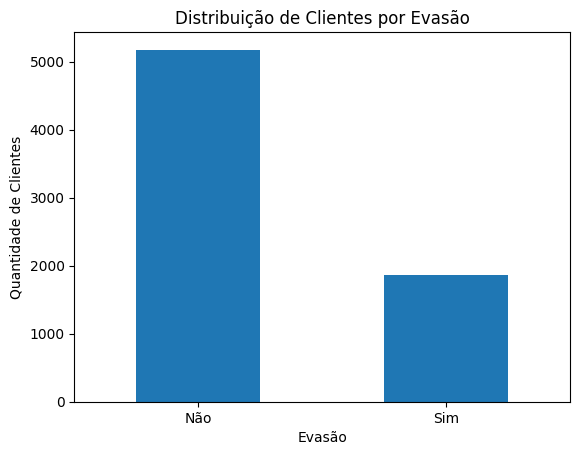

In [380]:
ax = df_final['evasao_cliente'].value_counts().plot(kind='bar')

plt.title('Distribuição de Clientes por Evasão')
plt.xlabel('Evasão')
plt.ylabel('Quantidade de Clientes')

ax.set_xticklabels(['Não', 'Sim'], rotation=0)

plt.show()

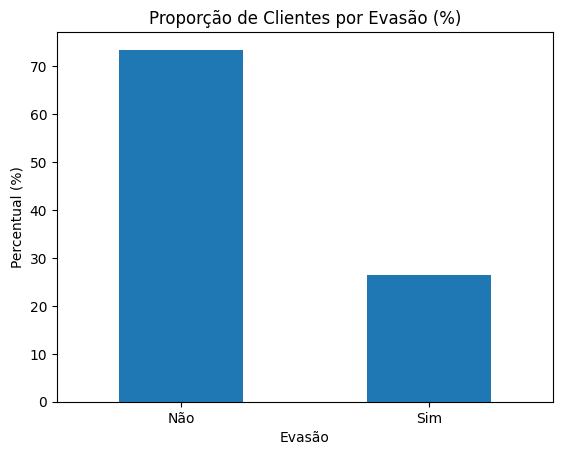

In [381]:
ax = (df_final['evasao_cliente']
      .value_counts(normalize=True)
      .mul(100)
      .plot(kind='bar'))

plt.title('Proporção de Clientes por Evasão (%)')
plt.xlabel('Evasão')
plt.ylabel('Percentual (%)')

ax.set_xticklabels(['Não', 'Sim'], rotation=0)

plt.show()


In [382]:
df_final['evasao_cliente'].value_counts()

,count
evasao_cliente,
0.0,5174
1.0,1869


In [383]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id_cliente             7267 non-null   object 
 1   evasao_cliente         7043 non-null   float64
 2   genero                 7267 non-null   object 
 3   idoso_65_ou_mais       7267 non-null   int64  
 4   possui_parceiro        7267 non-null   int64  
 5   possui_dependentes     7267 non-null   int64  
 6   tempo_contrato_meses   7267 non-null   int64  
 7   servico_telefonia      7267 non-null   int64  
 8   multiplas_linhas       7267 non-null   object 
 9   servico_internet       7267 non-null   object 
 10  seguranca_online       5686 non-null   float64
 11  backup_online          5686 non-null   float64
 12  protecao_dispositivo   5686 non-null   float64
 13  suporte_tecnico        5686 non-null   float64
 14  streaming_tv           5686 non-null   float64
 15  stre

In [384]:
pd.crosstab(
    df_final['genero'],
    df_final['evasao_cliente'],
    normalize='index'
) * 100


evasao_cliente,0.0,1.0
genero,,
female,73.079128,26.920872
male,73.839662,26.160338


In [385]:
df_final['genero_label'] = df_final['genero'].map({
    'female': 'Feminino',
    'male': 'Masculino'
})


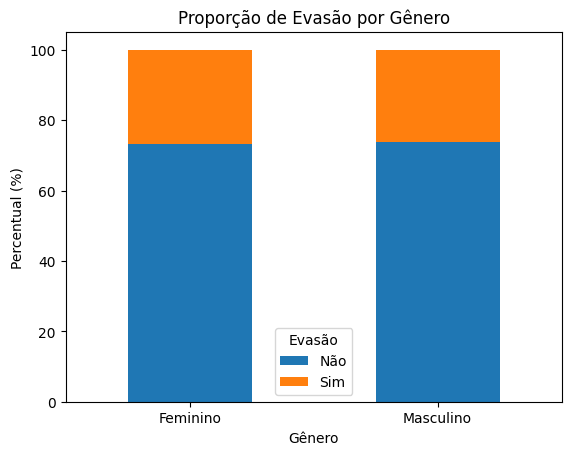

In [386]:
tabela = pd.crosstab(
    df_final['genero_label'],
    df_final['evasao_cliente'],
    normalize='index'
) * 100

ax = tabela.plot(kind='bar', stacked=True)

plt.title('Proporção de Evasão por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Percentual (%)')
plt.xticks(rotation=0)

ax.legend(title='Evasão', labels=['Não', 'Sim'])

plt.show()


In [387]:
pd.crosstab(
    df_final['tipo_contrato'],
    df_final['evasao_cliente'],
    normalize='index'
) * 100


evasao_cliente,0.0,1.0
tipo_contrato,,
month-to-month,57.290323,42.709677
one year,88.730482,11.269518
two year,97.168142,2.831858


In [388]:
df_final['contrato_label'] = df_final['tipo_contrato'].map({
    'month-to-month': 'Mensal',
    'one year': 'Um ano',
    'two year': 'Dois anos'
})

df_final['evasao_label'] = df_final['evasao_cliente'].map({
    0: 'Não',
    1: 'Sim'
})


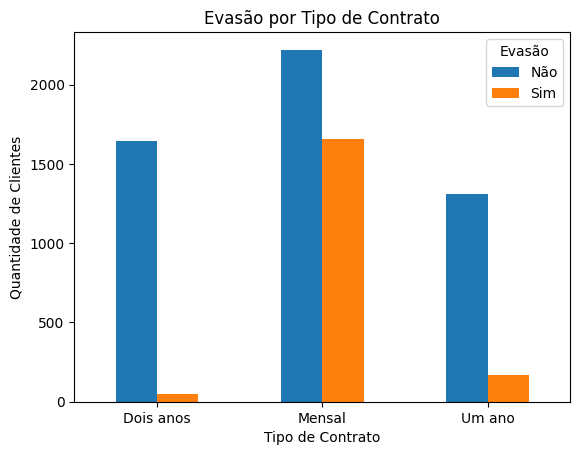

In [389]:
ax = pd.crosstab(
    df_final['contrato_label'],
    df_final['evasao_label']
).plot(kind='bar')

plt.title('Evasão por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Quantidade de Clientes')
plt.xticks(rotation=0)
plt.legend(title='Evasão')

plt.show()



In [390]:
pd.crosstab(
    df_final['metodo_pagamento'],
    df_final['evasao_cliente'],
    normalize='index'
) * 100


evasao_cliente,0.0,1.0
metodo_pagamento,,
bank transfer (automatic),83.290155,16.709845
credit card (automatic),84.756899,15.243101
electronic check,54.714588,45.285412
mailed check,80.893300,19.106700


In [391]:
df_final['metodo_pagamento'] = df_final['metodo_pagamento'].replace({
    'bank transfer (automatic)': 'Transferência Bancária (Automática)',
    'credit card (automatic)': 'Cartão de Crédito (Automático)',
    'electronic check': 'Cheque Eletrônico',
    'mailed check': 'Cheque Postado'
})


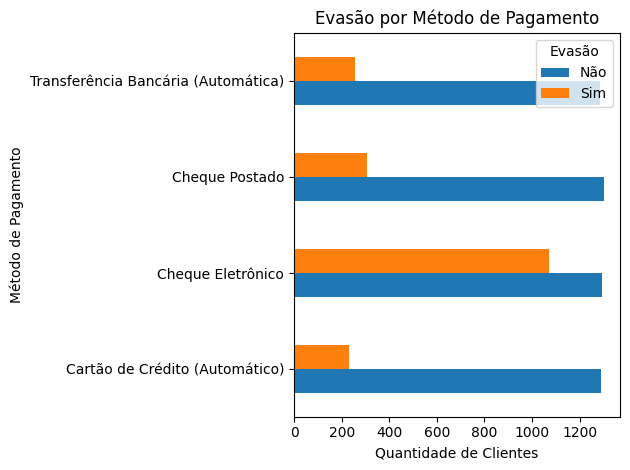

In [392]:
ax = pd.crosstab(
    df_final['metodo_pagamento'],
    df_final['evasao_cliente']
).plot(kind='barh')

plt.title('Evasão por Método de Pagamento')
plt.xlabel('Quantidade de Clientes')
plt.ylabel('Método de Pagamento')

ax.legend(
    title='Evasão',
    labels=['Não', 'Sim']
)

plt.tight_layout()
plt.show()




In [393]:
pd.crosstab(
    df_final['servico_internet'],
    df_final['evasao_cliente'],
    normalize='index'
) * 100


evasao_cliente,0.0,1.0
servico_internet,,
dsl,81.040892,18.959108
fiber optic,58.107235,41.892765
no,92.595020,7.404980


In [394]:
df_final['servico_internet'] = df_final['servico_internet'].replace({
    'dsl': 'DSL',
    'fiber optic': 'Fibra Óptica',
    'no': 'Sem Internet'
})


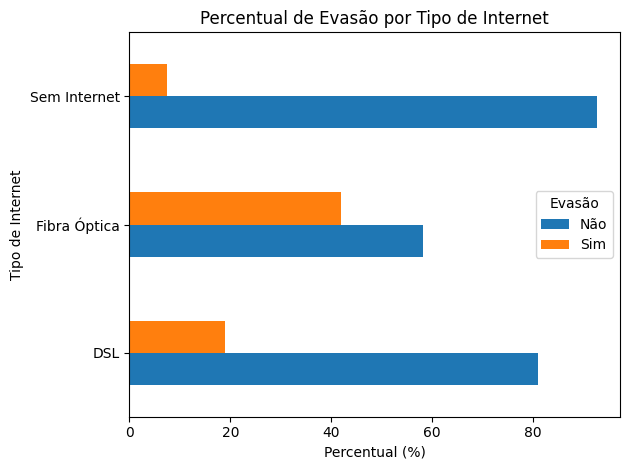

In [395]:
tabela_percentual = pd.crosstab(
    df_final['servico_internet'],
    df_final['evasao_cliente'],
    normalize='index'
) * 100

ax = tabela_percentual.plot(kind='barh')

plt.title('Percentual de Evasão por Tipo de Internet')
plt.xlabel('Percentual (%)')
plt.ylabel('Tipo de Internet')

ax.legend(
    title='Evasão',
    labels=['Não', 'Sim']
)

plt.tight_layout()
plt.show()


In [396]:
pd.crosstab(
    df_final['suporte_tecnico'],
    df_final['evasao_cliente'],
    normalize='index'
) * 100


evasao_cliente,0.0,1.0
suporte_tecnico,,
0.0,58.364526,41.635474
1.0,84.833659,15.166341


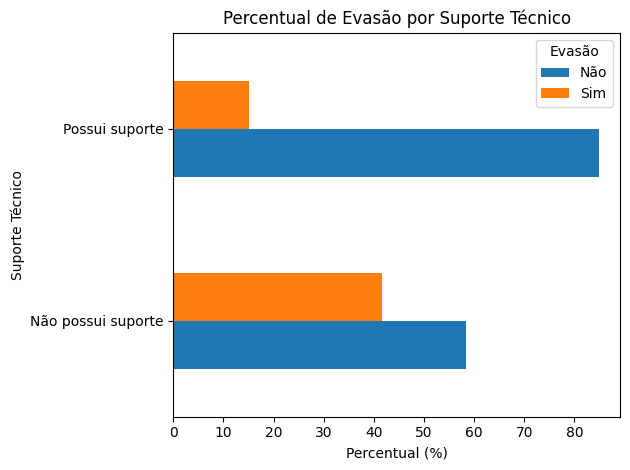

In [397]:
tabela_suporte = (
    pd.crosstab(
        df_final['suporte_tecnico'],
        df_final['evasao_cliente'],
        normalize='index'
    ) * 100
)

tabela_suporte.index = ['Não possui suporte', 'Possui suporte']

ax = tabela_suporte.plot(kind='barh')

plt.title('Percentual de Evasão por Suporte Técnico')
plt.xlabel('Percentual (%)')
plt.ylabel('Suporte Técnico')

ax.legend(
    title='Evasão',
    labels=['Não', 'Sim']
)

plt.tight_layout()
plt.show()



In [398]:
df_final.groupby('evasao_cliente')['tempo_contrato_meses'].describe()

,count,mean,std,min,25%,50%,75%,max
evasao_cliente,,,,,,,,
0.0,5174.0,37.569965,24.113777,0.0,15.0,38.0,61.0,72.0
1.0,1869.0,17.979133,19.531123,1.0,2.0,10.0,29.0,72.0


In [399]:
df_final.groupby('evasao_cliente')['valor_mensal_servicos'].describe()

,count,mean,std,min,25%,50%,75%,max
evasao_cliente,,,,,,,,
0.0,5174.0,61.265124,31.092648,18.25,25.10,64.425,88.4,118.75
1.0,1869.0,74.441332,24.666053,18.85,56.15,79.650,94.2,118.35


In [400]:
df_final.groupby('evasao_cliente')['total_gasto_cliente'].describe()

,count,mean,std,min,25%,50%,75%,max
evasao_cliente,,,,,,,,
0.0,5163.0,2555.344141,2329.456984,18.80,577.825,1683.60,4264.125,8672.45
1.0,1869.0,1531.796094,1890.822994,18.85,134.500,703.55,2331.300,8684.80


In [401]:
df_final['evasao_cliente'] = df_final['evasao_cliente'].replace({
    0: 'Não',
    1: 'Sim'
})

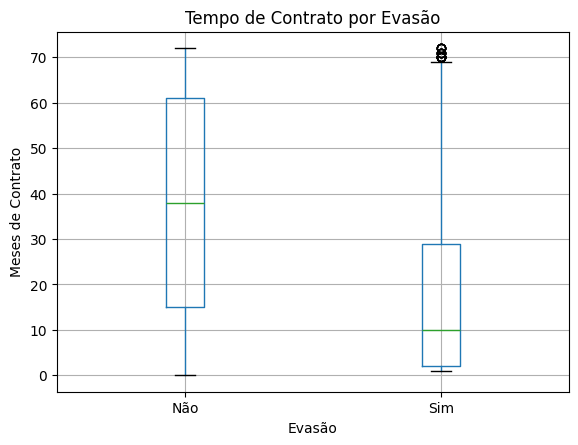

In [402]:
df_final.boxplot(
    column='tempo_contrato_meses',
    by='evasao_cliente'
)

plt.title('Tempo de Contrato por Evasão')
plt.suptitle('')
plt.xlabel('Evasão')
plt.ylabel('Meses de Contrato')
plt.show()


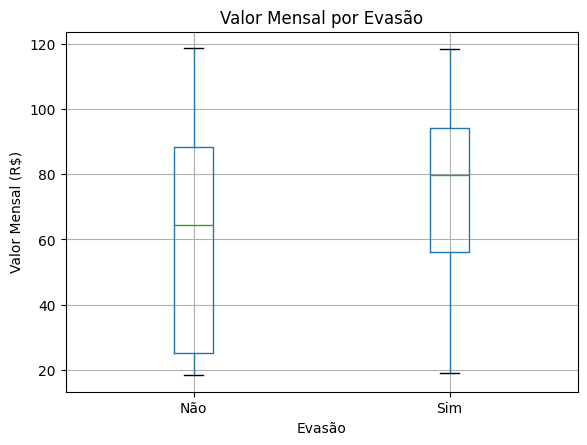

In [403]:
df_final.boxplot(
    column='valor_mensal_servicos',
    by='evasao_cliente'
)

plt.title('Valor Mensal por Evasão')
plt.suptitle('')
plt.xlabel('Evasão')
plt.ylabel('Valor Mensal (R$)')
plt.show()


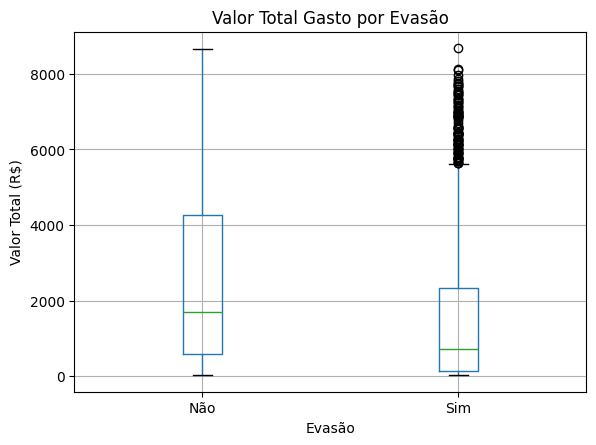

In [404]:
df_final.boxplot(
    column='total_gasto_cliente',
    by='evasao_cliente'
)

plt.title('Valor Total Gasto por Evasão')
plt.suptitle('')
plt.xlabel('Evasão')
plt.ylabel('Valor Total (R$)')
plt.show()


#📄Relatorio Final

## 1. Introdução

O objetivo deste projeto é analisar o fenômeno de evasão de clientes (Churn) em uma empresa de telecomunicações.
A evasão ocorre quando um cliente decide cancelar o serviço, o que representa um impacto direto na receita da empresa.

A partir de um conjunto de dados contendo informações demográficas, serviços contratados, formas de pagamento e valores cobrados, buscamos:

*   Entender como a evasão está distribuída;
*   Identificar padrões associados ao cancelamento;
* Gerar insights que auxiliem na retenção de clientes.







### 2. Limpeza e Tratamento de Dados

Nesta etapa, os dados passaram por um processo de preparação para garantir consistência e confiabilidade na análise.

#### 2.1 Importação e estruturação



*   Os dados foram carregados a partir de um arquivo JSON.
*   Estruturas aninhadas foram normalizadas, resultando em um DataFrame único (df_final).


#### 2.2 Padronização de colunas



*   Os nomes das colunas foram padronizados para minúsculas, sem espaços, facilitando o acesso e a leitura.
*   As colunas foram renomeadas para termos mais claros em português, como:
    *   tenure → tempo_contrato_meses
    *   MonthlyCharges → valor_mensa
    *   TotalCharges → valor_total
    *   Churn → evasao_cliente


#### 2.3 Conversão de tipos


*   Variáveis numéricas foram convertidas corretamente usando `pd.to_numeric`.
*   Valores inválidos foram tratados como `NaN`.

### 3 Análise Exploratória de Dados

A análise exploratória teve como foco entender como a evasão se distribui entre diferentes perfis de clientes.

#### 3.1 Distribuição da evasão


*   A variável evasao_cliente foi analisada para entender a proporção entre clientes que permaneceram e os que cancelaram.

*   Gráficos de barras mostraram claramente que a maioria dos clientes permanece, mas uma parcela relevante realiza evasão.



#### 3.2 Evasão por variáveis categóricas


*   Gênero
*   Tipo de contrato
*   Método de pagamento
*   Tipo de serviço de internet
*   Serviços adicionais (suporte técnico, segurança online, streaming, etc.)

**Essas análises mostraram que:**

*   Clientes com contratos mensais apresentam maior taxa de evasão.
*   Métodos de pagamento como cheque eletrônico possuem maior proporção de evasão.
*   Clientes sem serviços adicionais, como suporte técnico, tendem a cancelar mais.

**Gráficos foram adaptados para:**

*  Exibir rótulos em português
*  Substituir valores 0 e 1 por “Não” e “Sim”
*  Melhorar a legibilidade visual

#### 3.3 Análise de variáveis numéricas

Variáveis como:

*   total_gasto_cliente
*   valor_mensal_servicos
*   tempo_contrato_meses

Foram comparadas entre clientes que cancelaram e os que não cancelaram, evidenciando que:


*   Clientes com menor tempo de contrato apresentam maior evasão.
*   Clientes que gastaram menos ao longo do tempo tendem a cancelar mais.


### 4 Conclusões e Insights

A análise revelou padrões importantes relacionados à evasão de clientes:

*   O **tempo de contrato** é um fator fortemente associado a evasão.
*   Contratos de **curto prazo** apresentam maior risco de **cancelamento**.
*   A **ausência de serviços adicionais** aumenta a probabilidade de evasão.
*   Determinados **métodos de pagamento** estão associados a maiores taxas de evasão.

Esses insights permitem compreender melhor o comportamento dos clientes e identificar grupos mais vulneráveis à evasão.

### 5 Recomendações

Com base nos resultados obtidos, algumas ações estratégicas podem ser sugeridas:

*   Incentivar contratos de **maior duração**, oferecendo descontos ou benefícios.
*   Criar programas de retenção para clientes nos **primeiros meses de contrato**.
*   Estimular a adesão a **serviços adicionais**, como suporte técnico e segurança online.
*   Avaliar políticas específicas para clientes que utilizam métodos de pagamento com maior evasão.

Essas medidas podem contribuir para reduzir o churn e aumentar a fidelização dos clientes.
